# Import libraries

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from diffusers import DDPMScheduler
from PIL import Image
import cv2

# Forward diffusion with DDPM

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.14132603963803272..1.060563250017334].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.24493022727383615..1.2158162970768929].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3479515924217356..1.3671957619727126].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4773535948461377..1.5160835987091663].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6228759233699204..1.662676011037464].


torch.Size([1, 3, 128, 128])
torch.Size([1, 3, 128, 128])


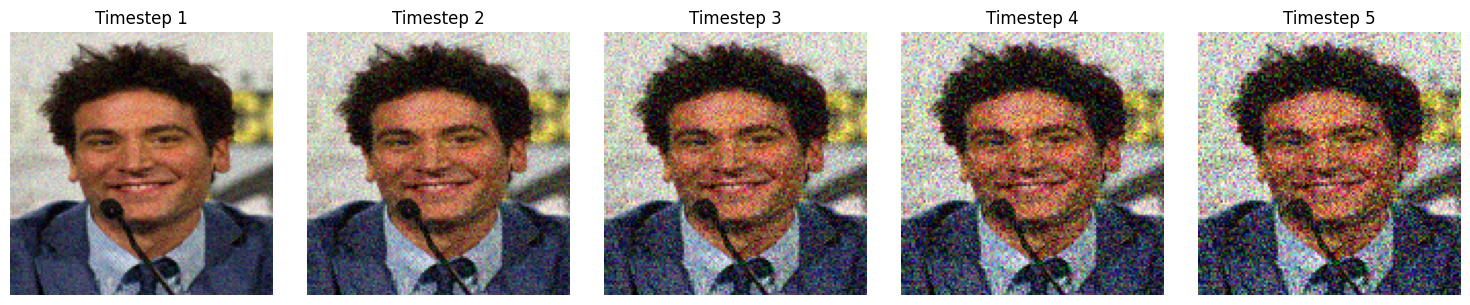

In [27]:
# Load image function
def load_image(image_path='./dataset/test_image.jpg', target_size=(128, ) * 2):
    """Load an image from the specified path, resize it, and return as a numpy array."""
    image = Image.open(image_path).convert('RGB')
    image = image.resize(target_size)  # Resize to target size
    return np.array(image) / 255.0  # Normalize to [0, 1]

# Plot images function
def plot_images(timesteps, noisy_images):
    """Plot noisy images at different timesteps."""
    num_images = min(5, noisy_images.shape[0])  # Limit to 5 images for plotting
    plt.figure(figsize=(15, 3))
    
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(noisy_images[i].transpose(1, 2, 0))  # Convert to HWC format
        plt.title(f'Timestep {timesteps[i].item()}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Main code
max_timesteps = 10

noise_scheduler = DDPMScheduler(
    num_train_timesteps=max_timesteps,
    beta_start=0.0001,
    beta_end=0.02
)

image = torch.tensor(load_image()).permute(2, 0, 1).unsqueeze(axis=0)
image_shape = image.shape
print(image_shape)

timesteps = torch.arange(1, max_timesteps)
noise = torch.randn(image_shape)
print(noise.shape)

noisy_images = noise_scheduler.add_noise(image, noise, timesteps).numpy()

plot_images(timesteps, noisy_images)